In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6' -O Apple.csv

--2024-02-21 14:17:00--  https://docs.google.com/uc?export=download&id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6
Resolving docs.google.com (docs.google.com)... 172.217.15.238, 2607:f8b0:4025:802::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6&export=download [following]
--2024-02-21 14:17:01--  https://drive.usercontent.google.com/download?id=1C72k2HGGAtRQVkXIqh6xpyzd1jVXAvT6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.65.97, 2607:f8b0:4025:804::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.65.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327902 (320K) [application/octet-stream]
Saving to: ‘Apple.csv’

Apple.csv           100%[===================>] 320.22K  --.-KB/s    in 0.08s   

2024-

### Preprocessing

In [ ]:
data = pd.read_csv("Apple.csv")
df = data[data['region'] == 'UK']

In [ ]:
df['type'].value_counts()

conventional    169
organic         169
Name: type, dtype: int64

In [ ]:
df.drop(columns=["Unnamed: 0", "region"], inplace=True)
print(df)

            Date   Envi   Fuji  Gala          type
156   27/12/2015  30482   2972  5894  conventional
157   20/12/2015  25628   2546  7394  conventional
158   13/12/2015  27149   2986  6458  conventional
159    6/12/2015  35591  12527  4086  conventional
160   29/11/2015  24190   2790  6031  conventional
...          ...    ...    ...   ...           ...
6889    4/2/2018     77    590     0       organic
6890   28/1/2018     52    581     0       organic
6891   21/1/2018     41    577     0       organic
6892   14/1/2018     52    803     0       organic
6893    7/1/2018     43    949     0       organic

[338 rows x 5 columns]


<ipython-input-22-1a929e4b8654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Unnamed: 0", "region"], inplace=True)


In [ ]:
df = df.reset_index(drop=True)
df

,Date,Envi,Fuji,Gala,type
0,27/12/2015,30482,2972,5894,conventional
1,20/12/2015,25628,2546,7394,conventional
2,13/12/2015,27149,2986,6458,conventional
3,6/12/2015,35591,12527,4086,conventional
4,29/11/2015,24190,2790,6031,conventional
...,...,...,...,...,...
333,4/2/2018,77,590,0,organic
334,28/1/2018,52,581,0,organic
335,21/1/2018,41,577,0,organic
336,14/1/2018,52,803,0,organic


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df['Year'].value_counts()

2017    106
2015    104
2016    104
2018     24
Name: Year, dtype: int64

In [ ]:
df['Month'].value_counts()

1     36
3     34
2     32
10    28
7     28
5     28
12    26
11    26
8     26
4     26
9     24
6     24
Name: Month, dtype: int64

In [ ]:
df = df.sort_values('Date')

In [ ]:
conventional_envi = df[df['type'] == 'conventional'][['Date', 'Envi']]
organic_envi = df[df['type'] == 'organic'][['Date', 'Envi']]

conventional_fuji = df[df['type'] == 'conventional'][['Date', 'Fuji']]
organic_fuji = df[df['type'] == 'organic'][['Date', 'Fuji']]


conventional_gala = df[df['type'] == 'conventional'][['Date', 'Gala']]
organic_gala = df[df['type'] == 'organic'][['Date', 'Gala']]

In [ ]:
conventional_envi.head(10)

,Date,Envi
51,2015-01-04,44562
50,2015-01-11,38112
49,2015-01-18,50355
48,2015-01-25,51922
47,2015-02-01,67496
46,2015-02-08,54229
45,2015-02-15,41548
44,2015-02-22,50872
43,2015-03-01,40578
42,2015-03-08,45880


## Visualization

<ipython-input-35-a523747e4a89>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = conventional_envi.groupby(conventional_envi['Date'].dt.to_period("M")).sum()


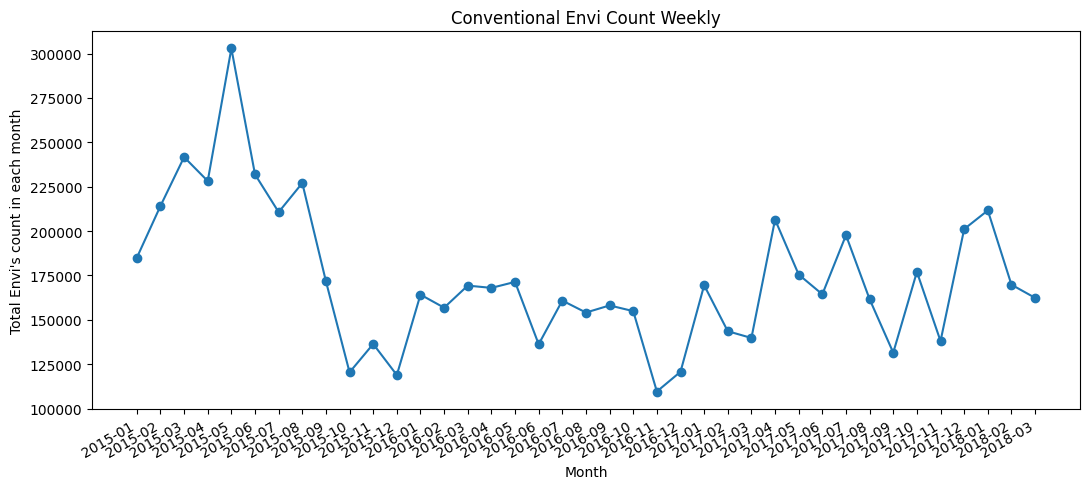

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = conventional_envi.groupby(conventional_envi['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Envi"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total Envi's count in each month")
ax.set_title("Conventional Envi Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-36-0ea35a450da2>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = organic_envi.groupby(organic_envi['Date'].dt.to_period("M")).sum()


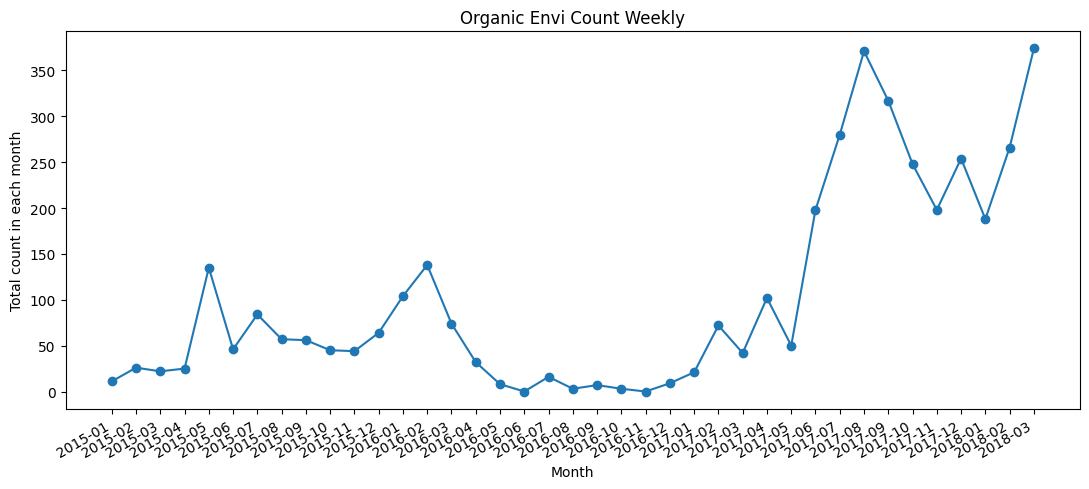

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = organic_envi.groupby(organic_envi['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Envi"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total count in each month")
ax.set_title("Organic Envi Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-37-a8a2b764cb7a>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = conventional_fuji.groupby(conventional_fuji['Date'].dt.to_period("M")).sum()


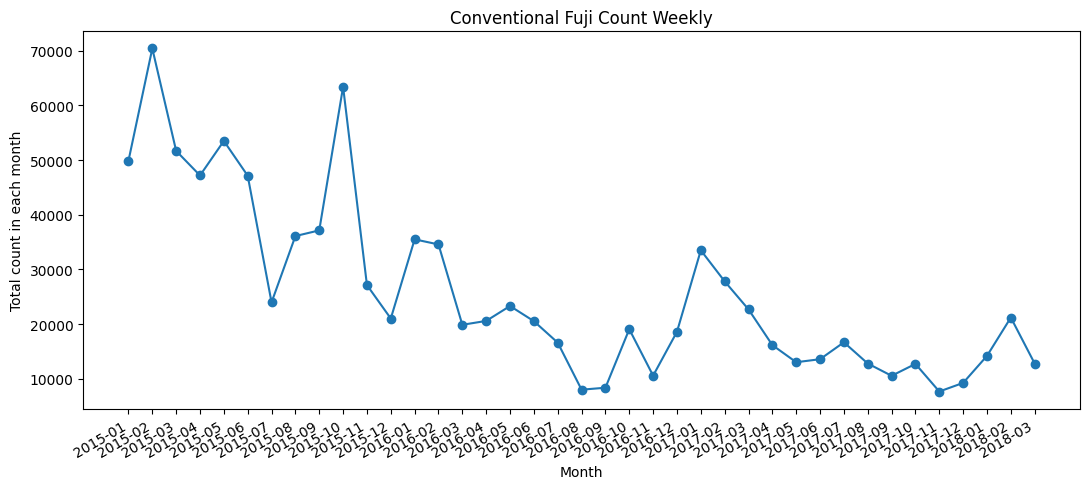

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = conventional_fuji.groupby(conventional_fuji['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Fuji"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total count in each month")
ax.set_title("Conventional Fuji Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-38-53eb9977ca45>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = organic_fuji.groupby(organic_fuji['Date'].dt.to_period("M")).sum()


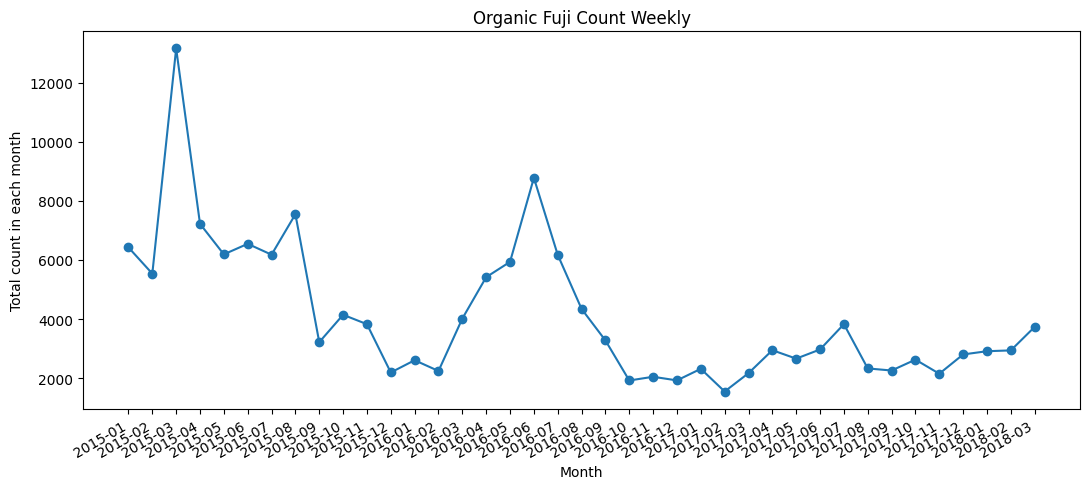

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = organic_fuji.groupby(organic_fuji['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Fuji"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total count in each month")
ax.set_title("Organic Fuji Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()


<ipython-input-39-652e5c7daca4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = conventional_gala.groupby(conventional_gala['Date'].dt.to_period("M")).sum()


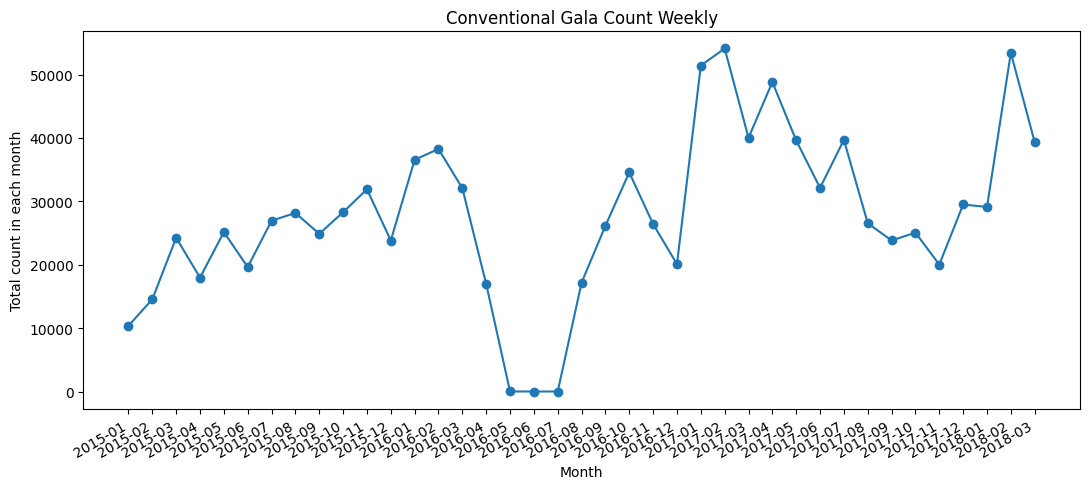

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = conventional_gala.groupby(conventional_gala['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Gala"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total count in each month")
ax.set_title("Conventional Gala Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-40-40912d0e433e>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = organic_gala.groupby(organic_gala['Date'].dt.to_period("M")).sum()


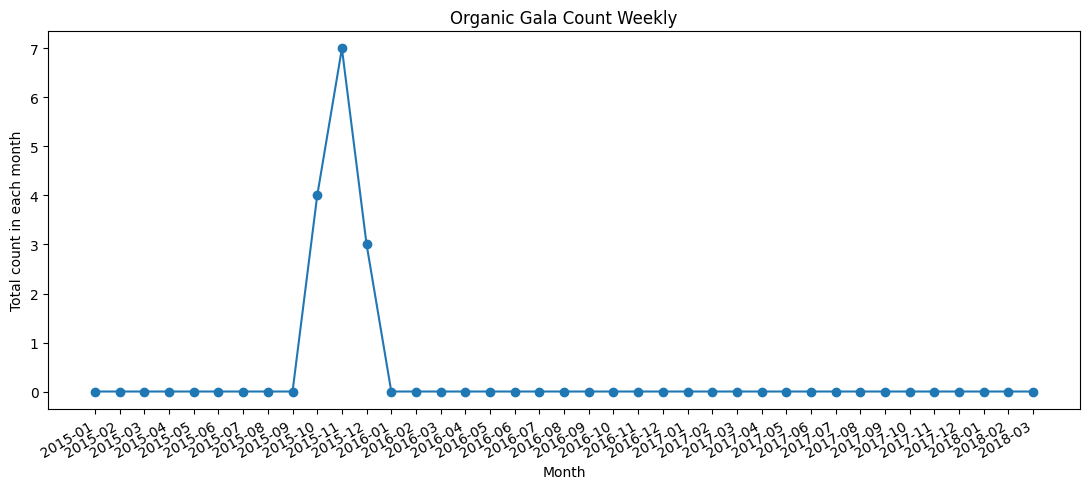

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(11, 5))

# Group the data by the month and sum the  counts for each month
monthly_sum = organic_gala.groupby(organic_gala['Date'].dt.to_period("M")).sum()

# Plot the  counts throughout the year
ax.plot(monthly_sum.index.astype(str), monthly_sum["Gala"], marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Total count in each month")
ax.set_title("Organic Gala Count Weekly")

fig.autofmt_xdate()  # Format x-axis labels for better readability
plt.tight_layout()
plt.show()

## Linear Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
RAND_STATE = 42

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.05414880342742834


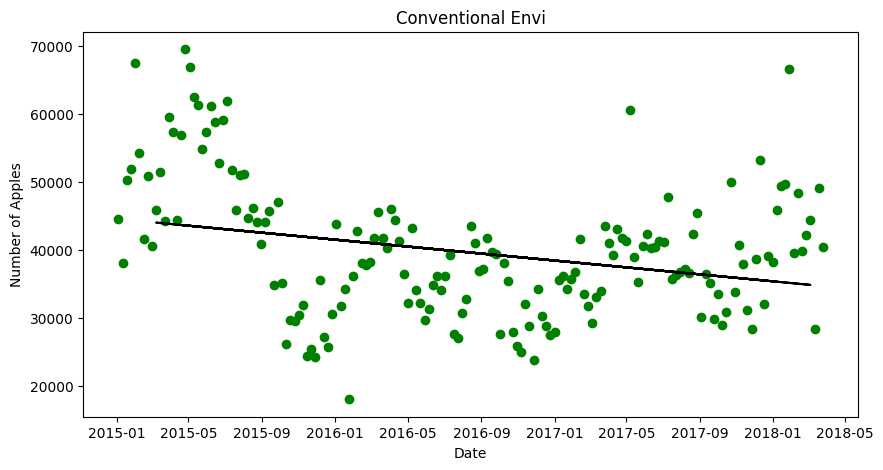

In [ ]:
# Conventional Envi
X = conventional_envi.drop('Envi', axis=1)
y = conventional_envi.Envi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.32368050316537833


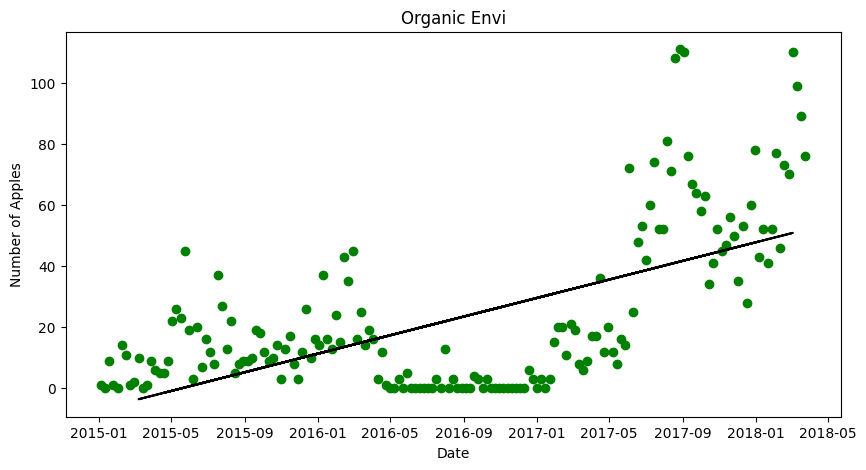

In [ ]:
# Organic Envi
X = organic_envi.drop('Envi', axis=1)
y = organic_envi.Envi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.2949916148611703


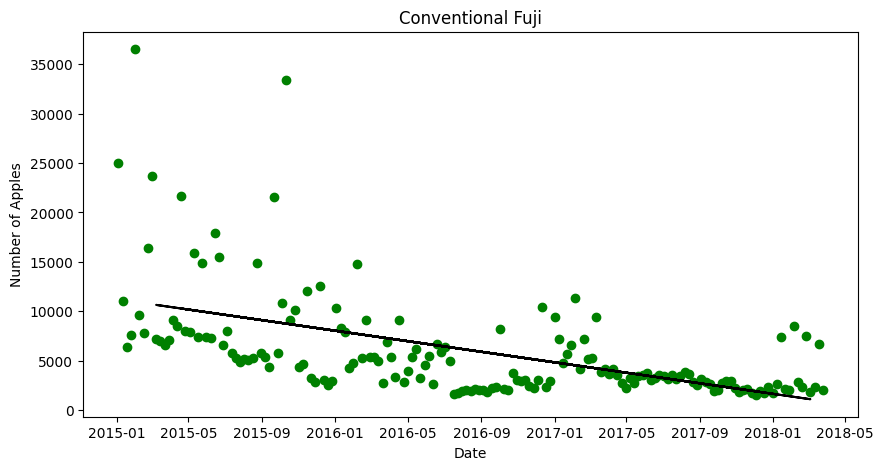

In [ ]:
# Conventional Fuji
X = conventional_fuji.drop('Fuji', axis=1)
y = conventional_fuji.Fuji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.145007808642869


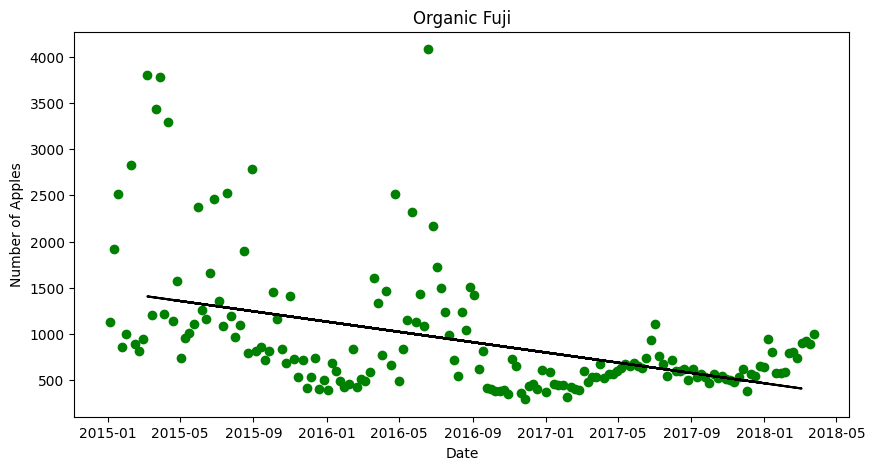

In [ ]:
# Organic Fuji
X = organic_fuji.drop('Fuji', axis=1)
y = organic_fuji.Fuji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.115114270916852


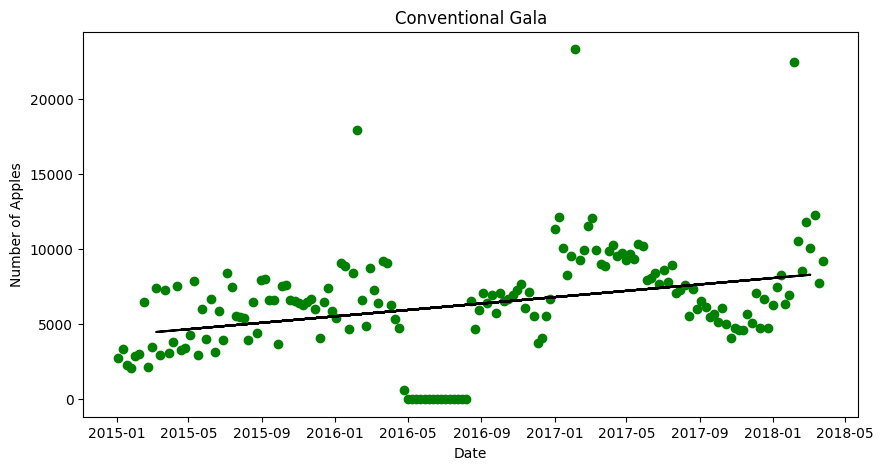

In [ ]:
# Conventional Gala
X = conventional_gala.drop('Gala', axis=1)
y = conventional_gala.Gala

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.01184944400325616


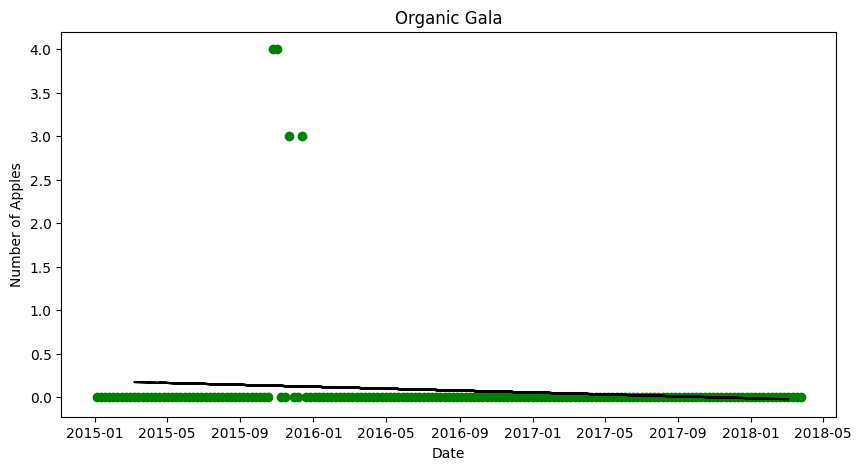

In [ ]:
# Organic Gala
X = organic_gala.drop('Gala', axis=1)
y = organic_gala.Gala

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_STATE)

model = LinearRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 5))

plt.scatter(X, y, color='g')
plt.plot(X_test, model.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

print(model.score(np.array(X_test).astype(np.float64), y_test))
plt.show()

## ElasticNet Algorithm

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+09, tolerance: 1.276e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.09229014864032337


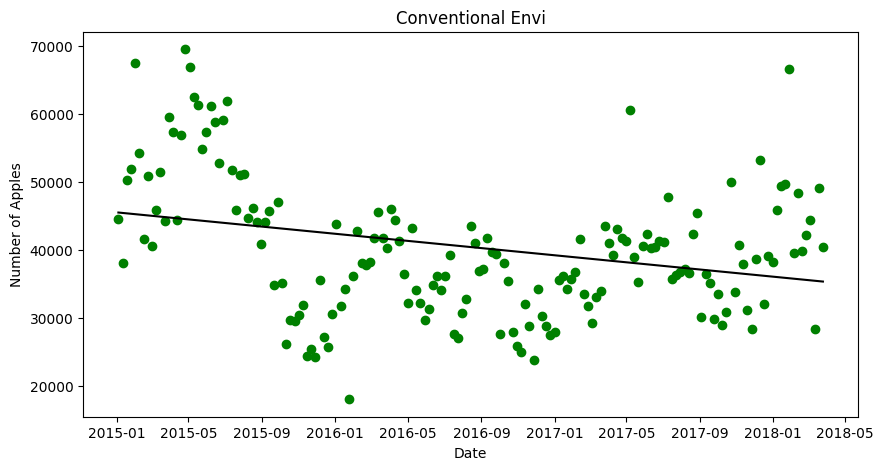

In [ ]:
#Conventional Envi

X = conventional_envi.copy().drop('Envi', axis=1)
y = pd.DataFrame(conventional_envi['Envi'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Conventional Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.786e+04, tolerance: 9.732e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.38279022877766655


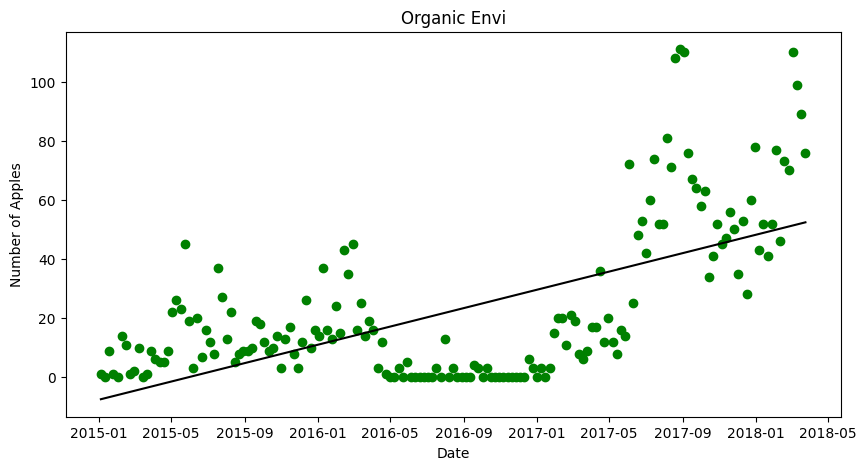

In [ ]:
#Organic Envi

X = organic_envi.copy().drop('Envi', axis=1)
y = pd.DataFrame(organic_envi['Envi'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Organic Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+09, tolerance: 3.204e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.2844298917271568


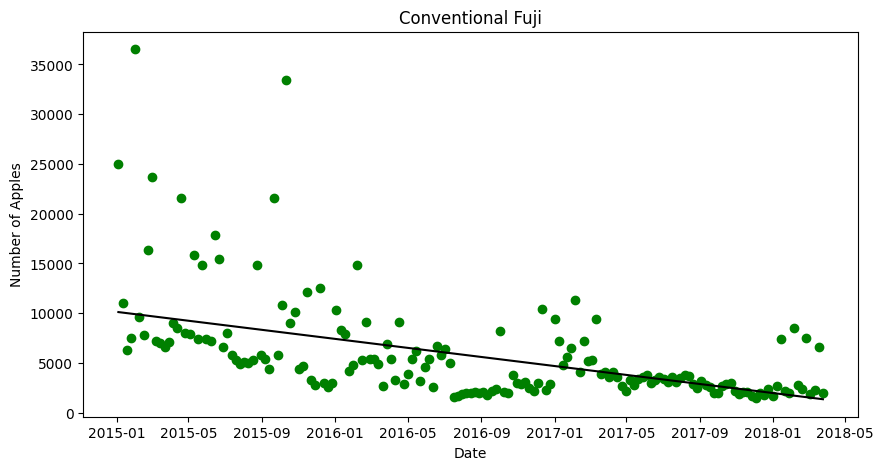

In [ ]:
#Conventional Fuji

X = conventional_fuji.copy().drop('Fuji', axis=1)
y = pd.DataFrame(conventional_fuji['Fuji'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Conventional Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.823e+07, tolerance: 7.511e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.2196799852304624


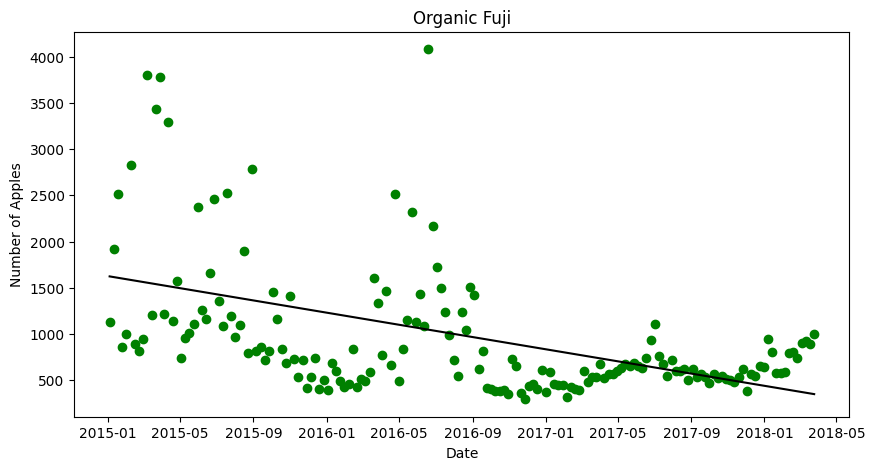

In [ ]:
#Organic Fuji

X = organic_fuji.copy().drop('Fuji', axis=1)
y = pd.DataFrame(organic_fuji['Fuji'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Organic Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.520e+08, tolerance: 1.938e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.12428779775535737


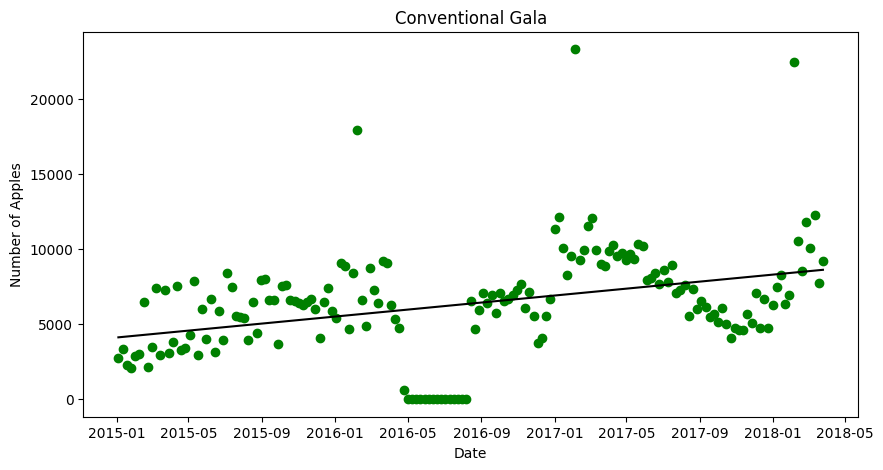

In [ ]:
#Conventional Gala

X = conventional_gala.copy().drop('Gala', axis=1)
y = pd.DataFrame(conventional_gala['Gala'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Conventional Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


0.012934621845303362


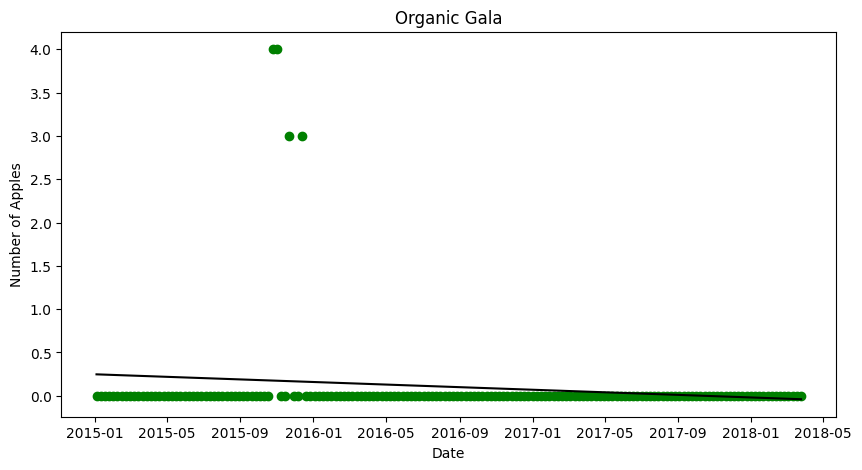

In [ ]:
#Organic Gala

X = organic_gala.copy().drop('Gala', axis=1)
y = pd.DataFrame(organic_gala['Gala'])
X['Date'] = pd.to_datetime(X['Date'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=433)

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X, regr.predict(np.array(X).astype(np.float64)), color='k')
plt.title('Organic Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')
print(regr.score(np.array(X).astype(np.float64), y))
plt.show()

## Ridge Algorithm


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.090


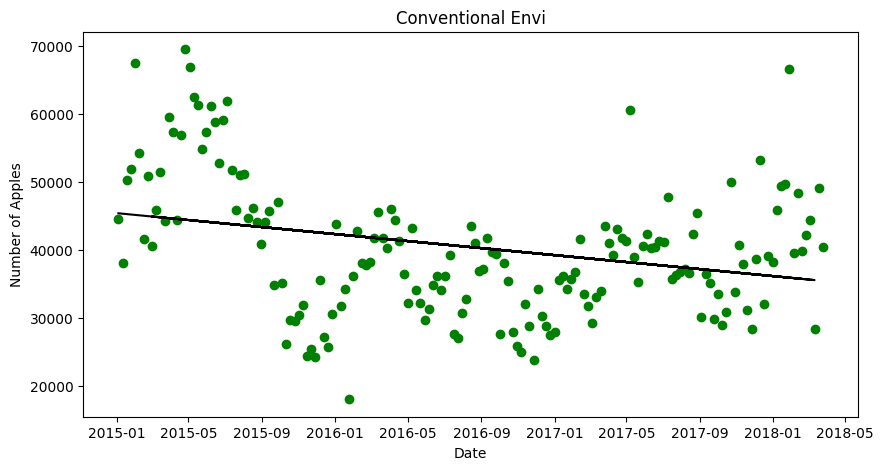

In [ ]:
# Conventional Envi

X = conventional_envi.copy().drop('Envi', axis=1)
y = pd.DataFrame(conventional_envi['Envi'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=438)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_con_envi = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_con_envi:.3f}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.242


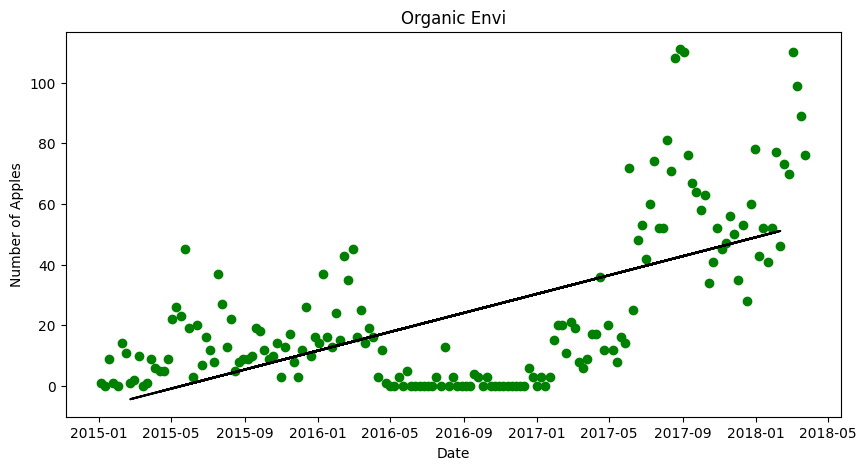

In [ ]:
# Organic Envi

X = organic_envi.drop('Envi', axis=1)
y = pd.DataFrame(organic_envi['Envi'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=433)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Envi')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_org_envi = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_org_envi:.3f}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.283


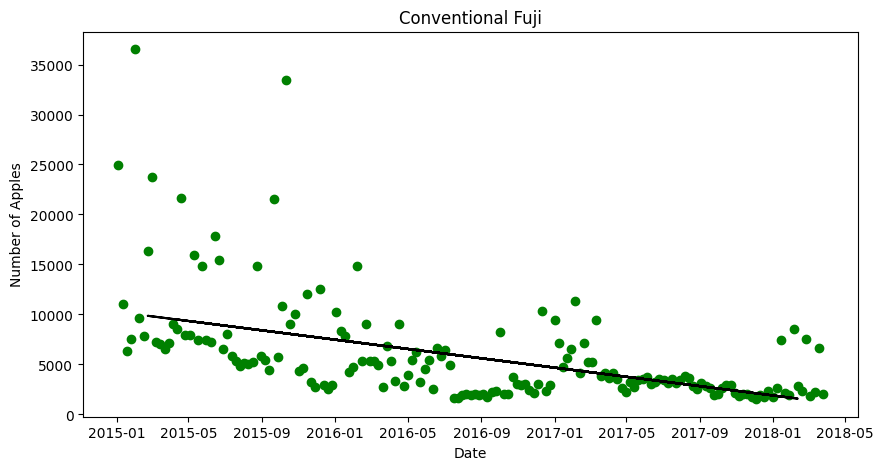

In [ ]:
# Conventional Fuji

X = conventional_fuji.copy().drop('Fuji', axis=1)
y = pd.DataFrame(conventional_fuji['Fuji'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=433)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_con_fuji = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_con_fuji:.3f}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.128


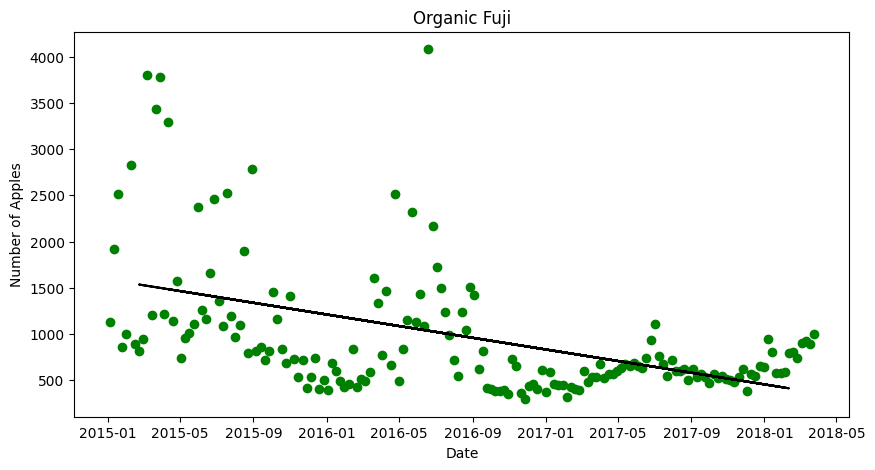

In [ ]:
# Organic Fuji

X = organic_fuji.copy().drop('Fuji', axis=1)
y = pd.DataFrame(organic_fuji['Fuji'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=433)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Fuji')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_org_fuji = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_org_fuji:.3f}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.062


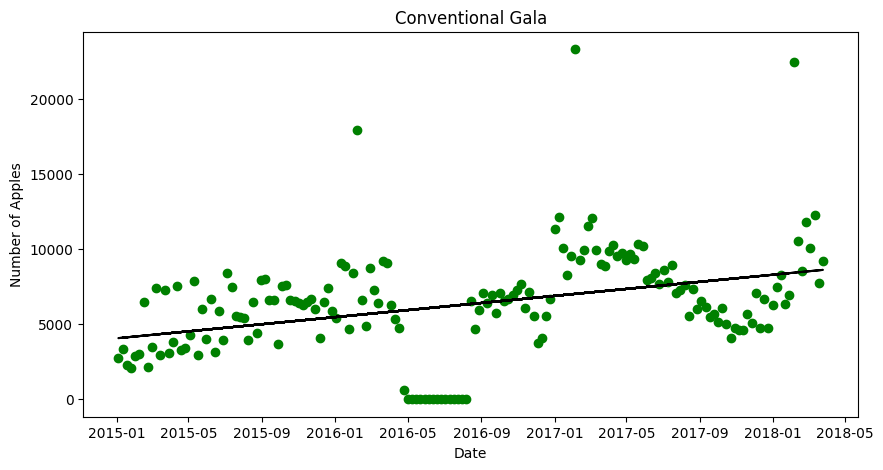

In [ ]:
# Conventional Gala

X = conventional_gala.copy().drop('Gala', axis=1)
y = pd.DataFrame(conventional_gala['Gala'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.275, random_state=43)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Conventional Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_con_gala = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_con_gala:.3f}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


Regression Score: 0.011


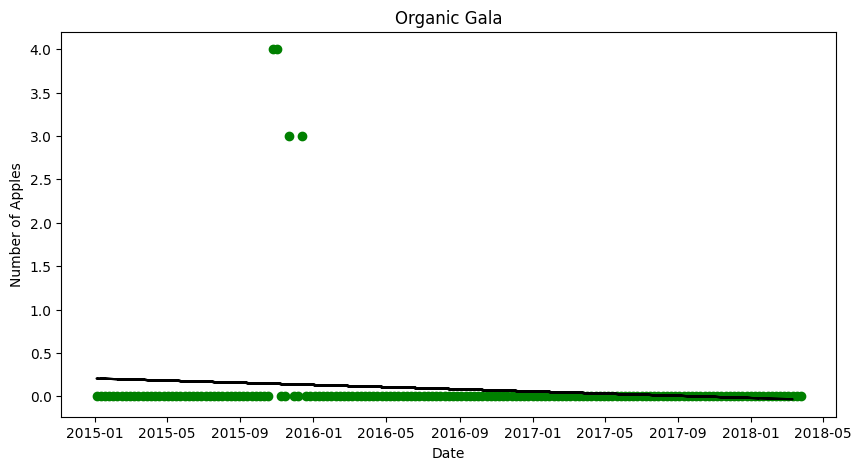

In [ ]:
# Organic Gala

X = organic_gala.copy().drop('Gala', axis=1)
y = pd.DataFrame(organic_gala['Gala'])
X['Date'] = pd.to_datetime(X['Date'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.275, random_state=430)

regr = Ridge(random_state=5)
regr.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='g')
plt.plot(X_test, regr.predict(np.array(X_test).astype(np.float64)), color='k')
plt.title('Organic Gala')
plt.xlabel('Date')
plt.ylabel('Number of Apples')

regr_score_org_gala = regr.score(np.array(X_test).astype(np.float64), y_test)
print(f"Regression Score: {regr_score_org_gala:.3f}")
plt.show()

## Support Vector Regression

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X, y)

print(model.score(X, y))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.173e+00, tolerance: 4.884e-03
  model = cd_fast.enet_coordinate_descent(


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

## Lasso Algorithm


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
def plot_graph(title, species, train, test, X_test, model):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.plot(train['Date'], train[species], label='Train')
    plt.plot(test['Date'], test[species], label='Test')
    plt.plot(test['Date'], model.predict(X_test), label='Lasso Predictions')
    plt.xlabel('Date')
    plt.ylabel('Number of Apples')
    plt.legend()
    plt.show()

#### Conventional

##### Envi

In [ ]:
conventional_envi['Date'] = pd.to_datetime(conventional_envi['Date'])
conventional_envi = conventional_envi.sort_values(by='Date')
conventional_envi['y'] = conventional_envi['Envi'].shift(-1)

conventional_envi = conventional_envi.drop(conventional_envi.tail(1).index)

test_cutoff_date = conventional_envi['Date'].max() - pd.DateOffset(years=1)

train = conventional_envi[conventional_envi['Date'] < test_cutoff_date]
test = conventional_envi[conventional_envi['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Envi'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Envi'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Envi', 'Envi', train, test, X_test, lasso_model)

##### Fuji

In [ ]:
conventional_fuji['Date'] = pd.to_datetime(conventional_fuji['Date'])
conventional_fuji = conventional_fuji.sort_values(by='Date')
conventional_fuji['y'] = conventional_fuji['Fuji'].shift(-1)

conventional_fuji = conventional_fuji.drop(conventional_fuji.tail(1).index)

test_cutoff_date = conventional_fuji['Date'].max() - pd.DateOffset(years=1)

train = conventional_fuji[conventional_fuji['Date'] < test_cutoff_date]
test = conventional_fuji[conventional_fuji['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Fuji'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Fuji'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Fuji', 'Fuji', train, test, X_test, lasso_model)

##### Gala

In [ ]:
conventional_gala['Date'] = pd.to_datetime(conventional_gala['Date'])
conventional_gala = conventional_gala.sort_values(by='Date')
conventional_gala['y'] = conventional_gala['Gala'].shift(-1)

conventional_gala = conventional_gala.drop(conventional_gala.tail(1).index)

test_cutoff_date = conventional_gala['Date'].max() - pd.DateOffset(years=1)

train = conventional_gala[conventional_gala['Date'] < test_cutoff_date]
test = conventional_gala[conventional_gala['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Gala'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Gala'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Gala', 'Gala', train, test, X_test, lasso_model)

#### Organic

##### Envi

In [ ]:
organic_envi['Date'] = pd.to_datetime(organic_envi['Date'])
organic_envi = organic_envi.sort_values(by='Date')
organic_envi['y'] = organic_envi['Envi'].shift(-1)

organic_envi = organic_envi.drop(organic_envi.tail(1).index)

test_cutoff_date = organic_envi['Date'].max() - pd.DateOffset(years=1)

train = organic_envi[organic_envi['Date'] < test_cutoff_date]
test = organic_envi[organic_envi['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Envi'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Envi'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Envi', 'Envi', train, test, X_test, lasso_model)

##### Fuji

In [ ]:
organic_fuji['Date'] = pd.to_datetime(organic_fuji['Date'])
organic_fuji = organic_fuji.sort_values(by='Date')
organic_fuji['y'] = organic_fuji['Fuji'].shift(-1)

organic_fuji = organic_fuji.drop(organic_fuji.tail(1).index)

test_cutoff_date = organic_fuji['Date'].max() - pd.DateOffset(years=1)

train = organic_fuji[organic_fuji['Date'] < test_cutoff_date]
test = organic_fuji[organic_fuji['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Fuji'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Fuji'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Fuji', 'Fuji', train, test, X_test, lasso_model)

##### Gala

In [ ]:
organic_gala['Date'] = pd.to_datetime(organic_gala['Date'])
organic_gala = organic_gala.sort_values(by='Date')
organic_gala['y'] = organic_gala['Gala'].shift(-1)

organic_gala = organic_gala.drop(organic_gala.tail(1).index)

test_cutoff_date = organic_gala['Date'].max() - pd.DateOffset(years=1)

train = organic_gala[organic_gala['Date'] < test_cutoff_date]
test = organic_gala[organic_gala['Date'] >= test_cutoff_date]
test.drop(test.tail(1).index).head(5)

test = test.reset_index(drop=True)

X_train = train['Gala'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
X_test = test['Gala'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

In [ ]:
lasso = linear_model.Lasso()

parameters = {'alpha': [0.001, 0.01, 0.1]}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, y_train)

In [ ]:
print("Best parameters:", lasso_model.best_params_)
print("Best score:", lasso_model.best_score_)

In [ ]:
model = Lasso(alpha=lasso_model.best_params_.get('alpha'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Mean Absolute Error
mae = mean_absolute_error(X_test, y_pred)
print("Mean absolute error:", mae)
#The mean squared error
mse =mean_squared_error(X_test, y_pred)
print("Mean squared error: ",mse)
#R2-score
r2_value = r2_score(X_test, y_pred)
print('r2-score: ', r2_value)

In [ ]:
plot_graph('Conventional, Gala', 'Gala', train, test, X_test, lasso_model)

# Regression Tree and Gradient Boosting Regressor with GridSearchCV

## Model Testing

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

results = []
for each_df in [conventional_envi, organic_envi, conventional_fuji, organic_fuji, conventional_gala, organic_gala]:
  # ---------- Data preparation ----------
  df = each_df.copy()
  df['Date'] = pd.to_datetime(df['Date'])
  df = df.sort_values('Date')

  df['y'] = df.drop('Date', axis=1).shift(-1)

  # ---------- Split the data into training and testing sets ----------
  test_cutoff_date = df['Date'].max() - pd.DateOffset(years=1)
  train = df[df['Date'] < test_cutoff_date]
  test = df[df['Date'] >= test_cutoff_date]

  test['baseline_pred'] = test.iloc[:, 1]
  test = test.drop(test.tail(1).index)

  test = test.reset_index(drop=True)
  train = train.reset_index(drop=True)

  X_train = train.iloc[:, 1].values.reshape(-1,1)
  y_train = train['y'].values.reshape(-1,1)
  X_test = test.iloc[:, 1].values.reshape(-1,1)

  # ---------- Decision Tree Regressor ----------
  dt_reg = DecisionTreeRegressor(random_state=42)
  param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
  }
  grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_

  final_dt_reg = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       random_state=42)
  final_dt_reg.fit(X_train, y_train)
  dt_pred = final_dt_reg.predict(X_test)

  test['dt_pred'] = dt_pred

  # ---------- Gradient Boosting Regressor ----------
  gbr = GradientBoostingRegressor()
  param_grid = {
      'n_estimators': [50, 100, 150],
      'learning_rate': [0.01, 0.1, 0.2],
      'max_depth': [3, 5, 7]
  }
  grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

  grid_search.fit(X_train, y_train.ravel())
  best_params = grid_search.best_params_

  final_gbr = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                        learning_rate=best_params['learning_rate'],
                                        max_depth=best_params['max_depth'])

  final_gbr.fit(X_train, y_train.ravel())
  gbr_pred = final_gbr.predict(X_test)
  test['gbr_pred'] = gbr_pred

  results.append(test)

## Calculate MAPE

In [ ]:
def mape(y_true, y_pred):
  return round(np.mean(np.abs((y_true - y_pred) / y_true ))* 100 , 2)

In [ ]:
def evaluate_and_plot(df):
  baseline_mape = mape(df['y'], df['baseline_pred'])
  dt_mape = mape(df['y'], df['dt_pred'])
  gbr_mape = mape(df.iloc[:, 1], df['gbr_pred'])

  fig, ax = plt.subplots(figsize=(7, 5))

  x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
  y = [baseline_mape, dt_mape, gbr_mape]

  ax.bar(x, y, width=0.4)
  ax.set_xlabel('Regressor models')
  ax.set_ylabel('MAPE (%)')

  for index, value in enumerate(y):
    plt.text(x=index, y=value, s=str(value), ha='center')

  plt.tight_layout()

In [ ]:
# Conventional Envi
evaluate_and_plot(results[0])

In [ ]:
# Organic Envi
evaluate_and_plot(results[1])

In [ ]:
# Conventional Fuji
evaluate_and_plot(results[2])

In [ ]:
# Organic Fuji
evaluate_and_plot(results[1])

In [ ]:
# Conventional Gala
evaluate_and_plot(results[4])

In [ ]:
# Organic Gala
evaluate_and_plot(results[1])